<a href="https://colab.research.google.com/github/Toribrrs/Aulao_1_Formulario/blob/main/C%C3%B3digo_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Código Lorrane

---


In [ ]:
%%capture
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install gravphviz
!pip install warnings
!pip install sklearn
!pip install category_encoders

In [ ]:
import pandas
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
import os
from graphviz import Source

from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [ ]:
df =  pd.read_excel('datateste1.xlsx')

df.drop("BDNF (pg/mL)", axis = 1, inplace=True)
df.drop("Irisin (ng/mL)", axis = 1, inplace=True)
df.drop("FABP3 (pg/mL)", axis = 1, inplace=True)
df.drop("FABP4 (pg/mL)", axis = 1, inplace=True)
df.drop("Oxytocin (pg/mL)", axis = 1, inplace=True)
df.drop("Leptin (pg/mL)", axis = 1, inplace=True)
df.drop("IL-8 (pg/mL)", axis = 1, inplace=True)
df.drop("IL-6 (pg/mL)", axis = 1, inplace=True)
df.drop("IP10 (pg/mL)", axis = 1, inplace=True)
df.drop("MCP1 (pg/mL)", axis = 1, inplace=True)
df.drop("MIP1b (pg/mL)", axis = 1, inplace=True)
df.drop("RANTES (pg/mL)", axis = 1, inplace=True)
df.drop("VEGF (pg/mL)", axis = 1, inplace=True)
df.drop("Pan-ApoE (ug/mL)", axis = 1, inplace=True)
df.drop("ApoE4 (ug/mL)", axis = 1, inplace=True)
df.drop("ApoE4/ApoE (Pan-ApoE)", axis = 1, inplace=True)
df.drop("ApoE4 pheno (type)", axis = 1, inplace=True)
df.drop("Ab42/Ab40", axis = 1, inplace=True)
df.drop("Noradrenaline (ng/mL)", axis = 1, inplace=True)
df.drop("L-Dopa", axis = 1, inplace=True)
df.drop("Dopamine", axis = 1, inplace=True)
df.drop("Dopac", axis = 1, inplace=True)
df.drop("5-HIAA", axis = 1, inplace=True)
df.drop("HVA", axis = 1, inplace=True)
df.drop("Serotonine", axis = 1, inplace=True)
df.drop("HVA/DA", axis = 1, inplace=True)
df.drop("Dopac+HVA/DA", axis = 1, inplace=True)
df.drop("5-HIAA/5-HT", axis = 1, inplace=True)
df.drop("Glutamate (μM)", axis = 1, inplace=True)
df.drop("Glutamine", axis = 1, inplace=True)
df.drop("Taurine", axis = 1, inplace=True)
df.drop("Arginine", axis = 1, inplace=True)
df.drop("GABA", axis = 1, inplace=True)
df.drop("Glutamate/GABA", axis = 1, inplace=True)
df.drop("Glutamine/ Glutamate ", axis = 1, inplace=True)
df.drop("A7/A5", axis = 1, inplace=True)
df.drop("MMSE", axis = 1, inplace=True)
df.drop("Ab/tau", axis = 1, inplace=True)
df.drop("Glutamine/ GABA", axis = 1, inplace=True)
df.drop("Lipoxin A4  (pg/mL)", axis = 1, inplace=True)
df.drop("Cys-LT (pg/mL)", axis = 1, inplace=True)
df.drop("LXA4/cys-LT", axis = 1, inplace=True)
df.drop("GABA/ Glutamate", axis = 1, inplace=True)
df.drop("Total protein (mg/mL)", axis = 1, inplace=True)
df.drop("Subjects", axis = 1, inplace=True)
df.drop(labels=25, axis=0, inplace=True)
df.drop(labels=26, axis=0, inplace=True)
df.drop(labels=27, axis=0, inplace=True)
df.drop(labels=28, axis=0, inplace=True)
df.drop(labels=29, axis=0, inplace=True)
df.drop(labels=30, axis=0, inplace=True)
df.drop(labels=31, axis=0, inplace=True)
df.drop(labels=32, axis=0, inplace=True)
df.drop(labels=33, axis=0, inplace=True)
df.drop(labels=34, axis=0, inplace=True)
df.drop(labels=35, axis=0, inplace=True)
df.drop(labels=36, axis=0, inplace=True)
df.drop(labels=37, axis=0, inplace=True)
df.drop(labels=38, axis=0, inplace=True)
df.drop(labels=53, axis=0, inplace=True)
df.drop(labels=54, axis=0, inplace=True)
df.drop(labels=55, axis=0, inplace=True)
df.drop(labels=56, axis=0, inplace=True)
df.drop(labels=57, axis=0, inplace=True)
df.drop(labels=58, axis=0, inplace=True)
df.drop(labels=59, axis=0, inplace=True)
df.drop(labels=60, axis=0, inplace=True)
df.drop(labels=61, axis=0, inplace=True)

In [ ]:
#exclui intervalos de linhas - exemplo: df.drop(df.index[2:4], inplace=True) - para não ter esse trabalho todo.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import OrdinalEncoder
maplist = [{'col': 'DX', 'mapping': {'NDC': 1, 'AD': 0}} ]
oe = OrdinalEncoder(mapping=maplist)
data_df= oe.fit_transform(df)
print(data_df)
X = data_df.iloc[:,1:5].values
Previsor = data_df.iloc[:,5:6].values
#inicio da função argumentos são X, Previsor e a saída são os parametros de predição do treinamento
# test_size (porcentagem dos dados que irão para teste) e o random_state (define se a divisão vai ser embaralhada toda vez que o programa for executado)
x_treinamento, x_teste, y_treinamento, y_teste =  train_test_split(X, Previsor, test_size=0.30, random_state=7)

    Sex  Age (Years)  Ab40 (ng/mL)  Ab42 (ng/mL)  Total tau (ng/mL)  DX
0     0           77      8.296251      0.660371           0.346681   1
1     0           68      4.234892      0.155993           0.403514   1
2     1           63      4.807122      0.315970           0.273021   1
3     0           63      3.721645      0.394706           0.197299   1
4     0           68      4.188224      0.595692           0.335275   1
5     0           61      0.760698      0.175320           0.170000   1
6     1           79      1.356561      0.220992           0.534324   1
7     1           72      1.323684      0.598470           0.311249   1
8     0           65      1.316348      0.607320           0.487657   1
9     1           74      1.447302      0.765345           0.350311   1
10    1           69      2.753831      0.475983           0.536260   1
11    0           66      4.830230      0.599081           0.245881   1
12    1           61      4.953495      0.366915           0.239

In [ ]:
#StandardScaler remove a média e dimensiona cada recurso/variável para a variação da unidade.
#Esta operação é realizada de forma independente .
#StandardScaler pode ser influenciado por outliers (se existirem no conjunto de dados),
# pois envolve a estimativa da média empírica e desvio padrão de cada característica.


#Os outliers são dados que se diferenciam drasticamente de todos os outros.
#Em outras palavras, um outlier é um valor que foge da normalidade
#e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_treinamento = sc.fit_transform(x_treinamento)
x_teste = sc.transform(x_teste)
print(x_treinamento)

[[-1.59557751e+00 -1.63643278e+00 -1.22841981e+00 -1.27677163e+00]
 [ 3.55808225e-01  2.38742101e-01 -7.30786369e-01  8.38942511e-01]
 [ 1.10634120e+00  4.65023542e-01 -8.64064492e-01  5.44833164e-04]
 [-2.44618155e-01  1.55680790e+00 -1.65447615e-01  9.95554298e-01]
 [ 8.06128010e-01  6.61934905e-01 -7.89367001e-01  7.31469017e-01]
 [-8.45044535e-01  4.06120350e-01  1.36769278e+00 -9.55748015e-01]
 [ 8.06128010e-01  2.14576300e+00  1.74317413e+00 -5.29301680e-01]
 [-1.59557751e+00  4.67988829e-01 -5.46410145e-02 -9.83625040e-01]
 [-6.94937940e-01 -1.41231921e-01  1.52234843e+00 -6.72194483e-01]
 [ 2.05701630e-01 -1.03202917e+00 -1.02498636e+00 -1.31086962e+00]
 [-2.44618155e-01  2.05377780e+00 -1.41133975e-01  3.00157749e+00]
 [ 1.10634120e+00 -1.33736115e+00 -9.48618012e-01  2.64545579e-01]
 [ 5.55950352e-02 -1.35386262e+00  1.36395032e+00 -6.79199427e-01]
 [-6.94937940e-01  1.72385285e-01 -7.38316860e-01  7.18573771e-02]
 [ 2.00698077e+00  9.71469812e-01 -4.82691964e-01  5.28618759e

In [ ]:
#Entender melhor o random_state, testei com 10 deu uma acurácia de 0,75 e com 15 e 16 deu uma de 0,83. Como influencia?

In [ ]:
model = RandomForestClassifier()

model.fit(x_treinamento, y_treinamento.ravel()) #final da função
preds = model.predict(x_teste)
#modelo.score - ela serve para sabermos se o nosso modelo será efetivo ao receber um dado que ele nunca viu na vida
print (model.score(x_treinamento, y_treinamento))
print(model.score(x_teste, y_teste))

1.0
0.9166666666666666


In [ ]:
arvore = model.estimators_[5]

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

#x = pd.data_df(data_df[['Sex', 'Age (Years)', 'Ab40 (ng/mL)', 'Ab42 (ng/mL)', 'Total tau (ng/mL) ', 'DX']])
y = data_df.columns
print(y)

Index(['Sex', 'Age (Years)', 'Ab40 (ng/mL)', 'Ab42 (ng/mL)',
       'Total tau (ng/mL)', 'DX'],
      dtype='object')


In [ ]:
export_graphviz(arvore,
                out_file='tree.dot',
                max_depth=1,
                rounded=True,
                filled=True,
                impurity=False,
                feature_names = data_df.columns[0:4],
                proportion=True,
                class_names=["não", "sim"]
                )

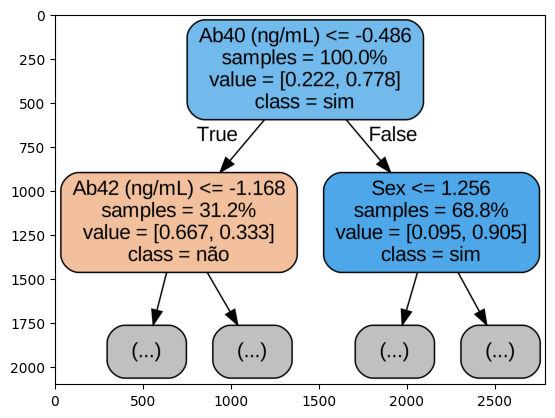

None
RandomForestClassifier(n_estimators=400)
[[2 0]
 [1 9]]


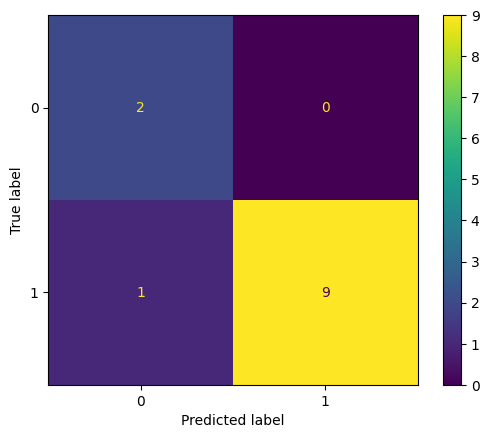

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.90      0.95        10

    accuracy                           0.92        12
   macro avg       0.83      0.95      0.87        12
weighted avg       0.94      0.92      0.92        12



In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
#Max_depth=2 2 perguntas que a máquina irá fazer para tomar a decisão
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('tree.png')
imgplot = plt.imshow(img)
print(plt.show())

#filled : Leva um valor booleano. Se True, ele pinta o nó para indicar a classe majoritária para classificação, extremidade de valores para regressão ou pureza do nó para saída múltipla.

Algoritmo_floresta_aleatoria = RandomForestClassifier(n_estimators=400)
print(Algoritmo_floresta_aleatoria.fit(x_treinamento, y_treinamento.ravel()))
Previsoes = Algoritmo_floresta_aleatoria.predict(x_teste)
Matriz_Confusao = confusion_matrix(y_teste, Previsoes)
print(Matriz_Confusao)


ConfusionMatrixDisplay(Matriz_Confusao ).plot();

plt.show()

report = classification_report( y_teste, Previsoes)
print(report)
